> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set specifies the relation between the appointments that are made but then the candidates don't show to it. Since this dataset shows the rate of show and no show appointments based on some variables, we used these variables to make questions to know about every factor

### Question(s) for Analysis
>Which gender doesn't show more?
>Are diseases factors for this?
>Is there a link with age?
>Are financial issues influential?


In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.8MB/s eta 0:00:01   13% |████▌                           | 1.5MB 18.6MB/s eta 0:00:01    49% |███████████████▉                | 5.2MB 16.0MB/s eta 0:00:01    76% |████████████████████████▌       | 8.0MB 17.0MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.7MB/s eta 0:00:01  4% |█▋                              | 655kB 14.4MB/s eta 0:00:01    11% |███▋                            | 1.5MB 30.7MB/s eta 0:00:01    24% |████████                        | 3.3MB 30.3MB/s eta 0:00:01    29% |█████████▌                      | 4.0MB 17.9MB/s eta 0:00:01    54% |█████████████████▌              | 7.3MB 26.5MB/s eta 0:00:01    60% |███████████████████▎            | 8.0MB 27.6MB/s eta 0:00:01    64% |████████████████████▊           | 8.7MB 18.5MB/s eta 0:00:01    75% |████████████████████████▏       | 10.1MB 30.6MB/s eta 0:00:01    80% |█████████████████████████▉      | 10.8MB 12.4MB/s eta 0:00:01    86% |████████████████████████

<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [4]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> The cleaning process was done through dropping non-necessary columns first, renaming columns with values that might make the analysis process harder,dropping null values from rows and colums and removing duplicates

In [9]:
#I will drop the scheduled day, the IDs as they aren't necessary 
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis=1,inplace=True)

In [10]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#we renamed this column to make it easier to navigate through it
df.rename(columns={'No-show':'Didnot_show'},inplace=True)
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Didnot_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#we drop rows with missing data to avoid having any null values
df.dropna(axis=0)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Didnot_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


In [13]:
#we drop columns with missing data to avoid having any null values
df.dropna(axis=1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Didnot_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


In [14]:
#we removed duplicates from the dataframe to get the appropriate data
df.drop_duplicates()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Didnot_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No
6,F,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,F,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,F,21,ANDORINHAS,0,0,0,0,0,0,No
9,F,19,CONQUISTA,0,0,0,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis




### The data in general

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3e70a46a0>,
      dtype=object)

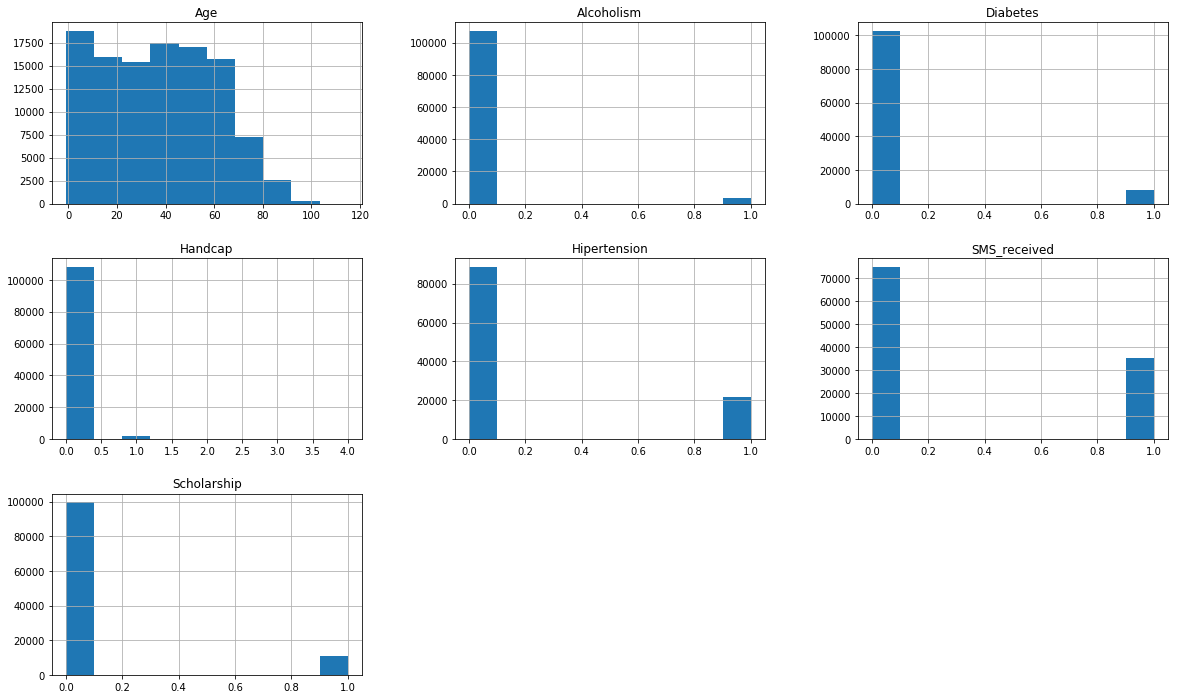

In [15]:
df.hist(figsize=(20,12))
#this is to show all the variable of the dataset in general histograms

In [16]:
df[df['Didnot_show']=='Yes'].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hipertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
Didnot_show      22319
dtype: int64

In [17]:
df[df['Didnot_show']=='No'].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hipertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
Didnot_show      88208
dtype: int64

In [18]:
def plotgraph(a,xlabel2,ylabel2,title1):
    plt.figure(figsize=[20,10])
    df[a][df['Didnot_show']=='No'].hist(alpha=0.5,label='Showed')
    df[a][df['Didnot_show']=='Yes'].hist(alpha=0.5,label='Didnot Show')
    plt.legend()
    plt.title(title1)
    plt.xlabel(xlabel2)
    plt.ylabel(ylabel2)
    
#this is to create a general function that plots the graphs 

In [19]:
def plotpie(a,title,yesno,label1,label2):
    my_labels=label1,label2
    plt.pie(df[a][df['Didnot_show']==yesno].value_counts(),labels=my_labels,autopct='%1.1f%%')
    plt.title(title)
    
    

### Research Question 1  (Which gender doesn't show more?)

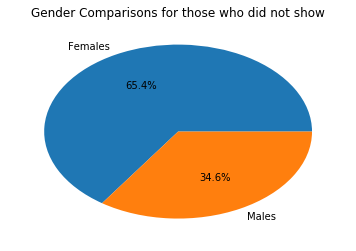

In [20]:
# we used piecharts to get the relation between the data based on gender
plotpie('Gender','Gender Comparisons for those who did not show','Yes','Females','Males')




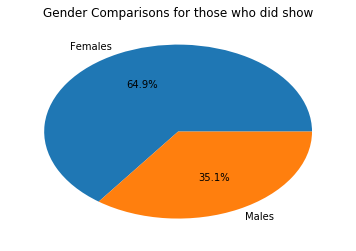

In [21]:
plotpie('Gender','Gender Comparisons for those who did show','No','Females','Males')

In [ ]:
#It was also important to highlight the numbers to appropriately refer to the graphs

In [22]:
print('The number of no show regarding Gender:')
df.Gender[df['Didnot_show']=='Yes'].value_counts()

The number of no show regarding Gender:


F    14594
M     7725
Name: Gender, dtype: int64

In [23]:
print('The number of show regarding Gender:')
df.Gender[df['Didnot_show']=='No'].value_counts()

The number of show regarding Gender:


F    57246
M    30962
Name: Gender, dtype: int64

In [24]:
df.Gender.value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

<a id='eda'></a>
## Conclusion 1
>  Statistics show that More females apply than males. However, more Females don't show than males.


### Research Question 2  (Are diseases factors for this?)

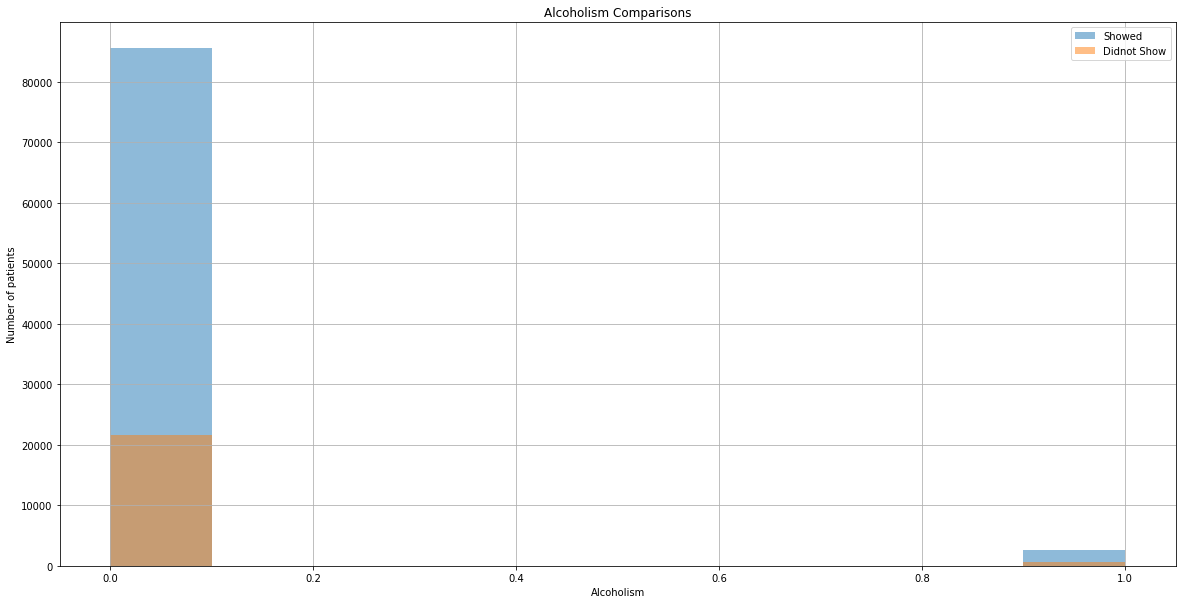

In [25]:
# we used histograms to get the relation between the data based on Alcoholism
plotgraph('Alcoholism','Alcoholism','Number of patients','Alcoholism Comparisons')

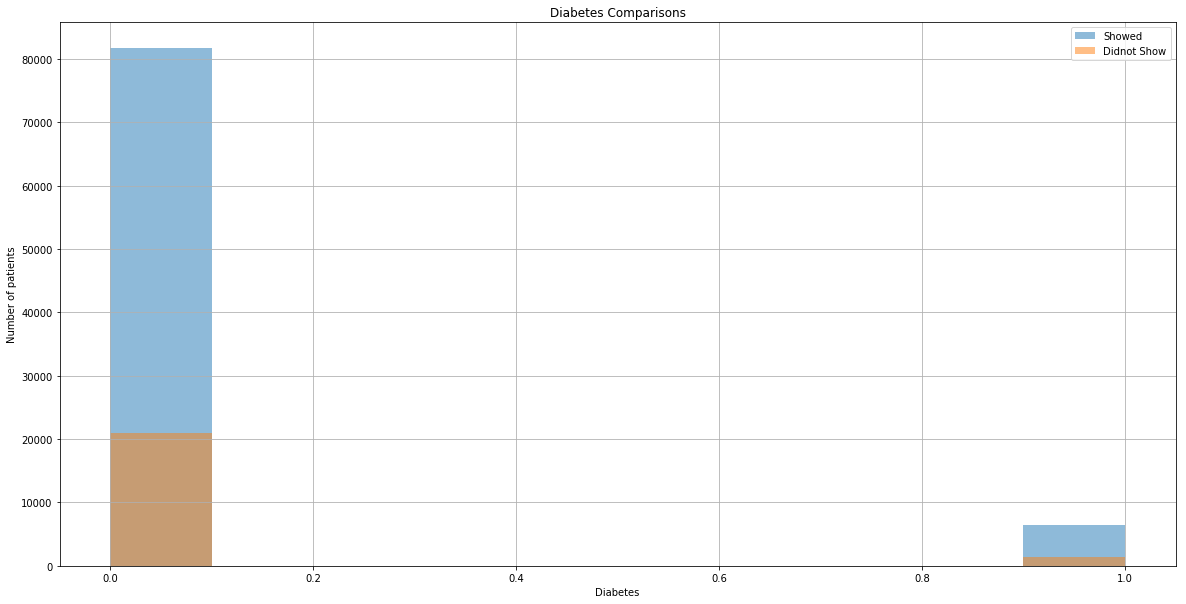

In [26]:
# we used histograms to get the relation between the data based on Diabetes
plotgraph('Diabetes','Diabetes','Number of patients','Diabetes Comparisons')

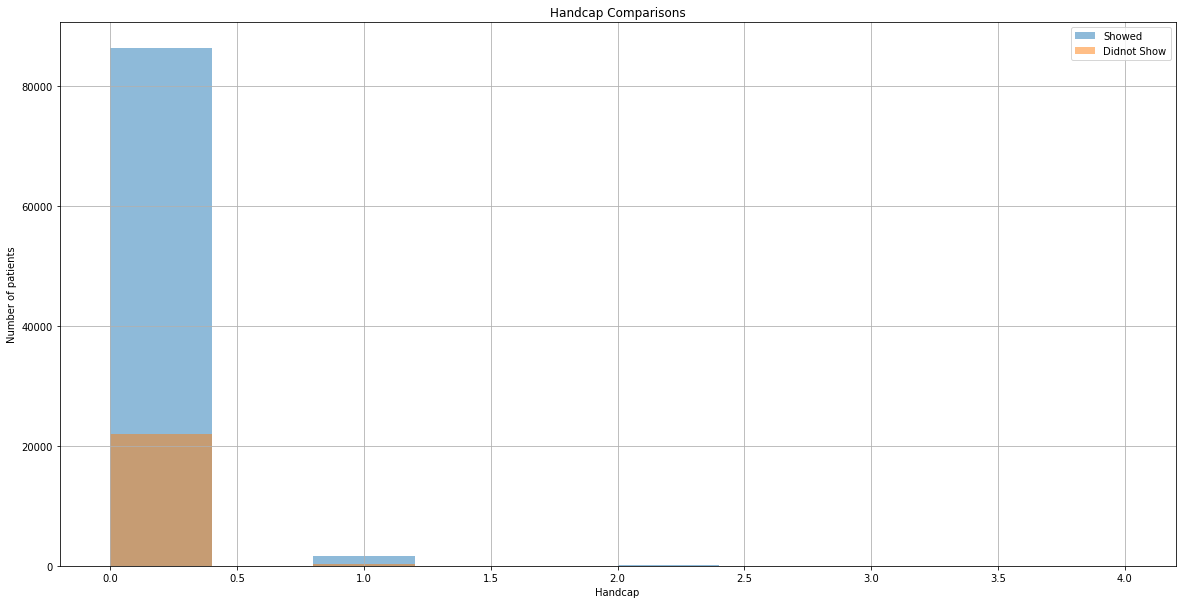

In [27]:
# we used histograms to get the relation between the data based on gender
plotgraph('Handcap','Handcap','Number of patients','Handcap Comparisons')

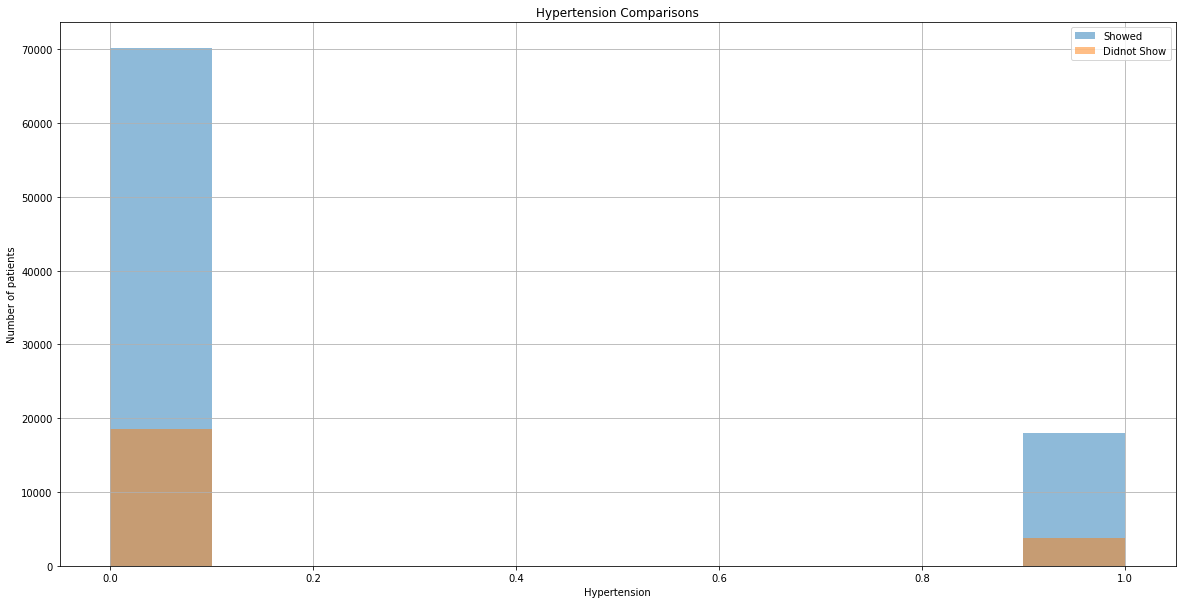

In [28]:
# we used histograms to get the relation between the data based on Hypertension
plotgraph('Hipertension','Hypertension','Number of patients','Hypertension Comparisons')

<a id='eda'></a>
## Conclusion 2
>  It's obvious that alcoholic patients and handicapped are negligible 
> , When it comes to diabetes and Hypertension--> although those who suffer are less than those who don't suffer, yet considerable portion of those who suffer didn't show



### Research Question 3 (Is there a link with age?)

Text(0,0.5,'Patients numbers')

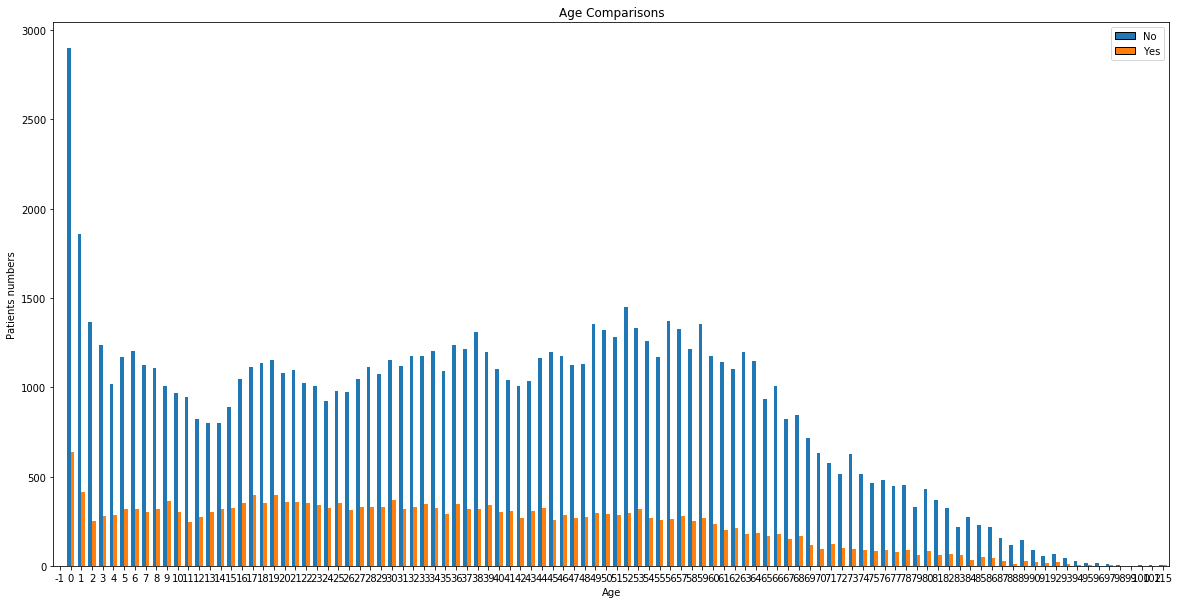

In [35]:
# we used barcharts to get the relation between the data based on age
plt.figure(figsize=[20,10])
df.groupby('Didnot_show').Age.value_counts().unstack('Didnot_show').sort_index().plot(kind='bar',figsize=[20,10],width=0.7,rot=0,edgecolor='black')
plt.legend()
plt.title('Age Comparisons')
plt.xlabel('Age')
plt.ylabel('Patients numbers')

<a id='eda'></a>
## Conclusion 3
>  When people grow up, their appointments decrease
> and The group between 0 and 10 have the highest no show rate
>  and The second highest group is the group between 30 and 37


### Research Question 4 (Are financial issues influential?)

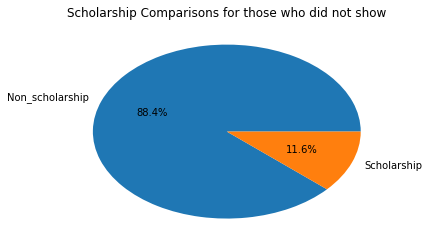

In [30]:
# we used piecharts to get the relation between the data based on the availability of a scholarship
plotpie('Scholarship','Scholarship Comparisons for those who did not show','Yes','Non_scholarship','Scholarship')


In [31]:
df['Scholarship'][df['Didnot_show']=='Yes'].value_counts()

0    19741
1     2578
Name: Scholarship, dtype: int64

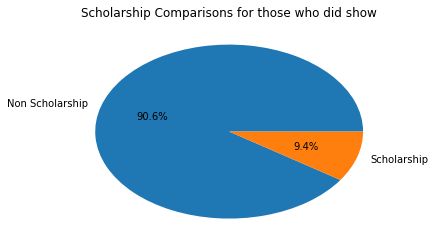

In [32]:
plotpie('Scholarship','Scholarship Comparisons for those who did show','No','Non Scholarship','Scholarship')

In [33]:
df['Scholarship'][df['Didnot_show']=='No'].value_counts()

0    79925
1     8283
Name: Scholarship, dtype: int64

<a id='eda'></a>
## Conclusion 4
> It's obvious that considerable portion of those who are on a scholarship didn't show which shows that money isn't the strongest factor


<a id='conclusions'></a>
## Conclusions

> For Gender: More Females don't show than males, For diseases:It's obvious that alcoholic patients and handicapped are negligible , When it comes to diabetes and Hypertension--> although those who suffer are less than those who don't suffer, yet considerable portion of those who suffer didn't show, For age:When people grow up, their appointments decrease and The group between 0 and 10 have the highest no show rate and The second highest group is the group between 30 and 37, For Financials: It's obvious that considerable portion of those who are on a scholarship didn't show which shows that money isn't the strongest factor.


### Limitations
> It was pretty difficult to use statistics to find the direct relation between factors, since the dataset has a lot of variables that they were all influential, it was pretty difficult to know about the strongest factor 



In [34]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0